## Regular Expression (정규표현식)

- 특정한 패턴과 일치하는 문자열을 검색,치환,제거 하는 기능 지원
- 크롤링하거나 데이터 추출할 때 우리가 원하는 조건을 가진 문자만 가져올 수 있는 아주 유용한 기능!

참고 링크: https://wikidocs.net/4308

- raw string : r붙으면 문자열 그대로 추출됨 (escapce 무시)

In [1]:
from IPython.display import Image

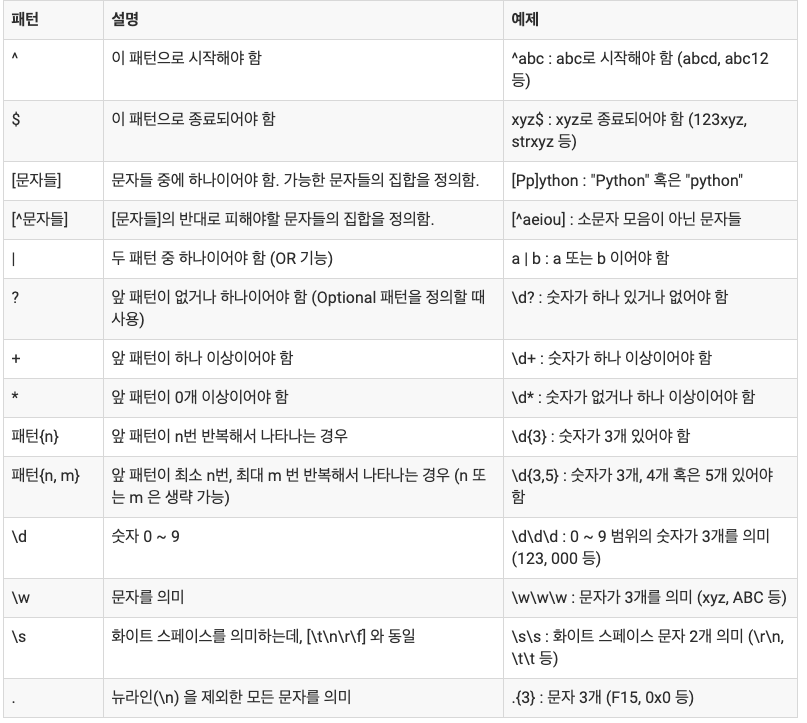

In [2]:
Image('../../data/re.png')

In [3]:
a='asdf\n' #escapce
print(a)
b=r'asdf\n' #raw string
print(b)

asdf

asdf\n


In [4]:
# 파이썬에서 정규식을 지원하는 모듈 
import re

## 1. re.search('정규식패턴','문자열')

- 패턴을 찾으면 match 객체 반환 , 찾지못하면 None 반환
- match 객체는 start(),end(),group() 함수를 가짐

In [5]:
m=re.search('abc','abcde')
print(m)
print(m.start())
print(m.end())
print(m.group())

<re.Match object; span=(0, 3), match='abc'>
0
3
abc


In [6]:
m=re.search('abc','1212abcde')
print(m)
print(m.start())
print(m.end())
print(m.group())

<re.Match object; span=(4, 7), match='abc'>
4
7
abc


In [7]:
m=re.search('ac','1212abcde')
print(m)

None


In [8]:
# 만약 포함한 문자가 여러개일경우 가장 첫번째 찾은 위치 반환
m=re.search('a','aabcde')
print(m)
print(m.start())
print(m.end())
print(m.group())

<re.Match object; span=(0, 1), match='a'>
0
1
a


In [9]:
m=re.search('\d\d','112aabcde')
print(m)
print(m.start())
print(m.end())
print(m.group())

<re.Match object; span=(0, 2), match='11'>
0
2
11


### []는 문자의 범위를 나타냄

- [abcd] : a or b or c or d
- [a-d] : 해당 문자 범위에 속하는 것 중 하나 
- [0-9] : 모든 숫자
- [a-z] : 모든 소문자
- [A-Z] : 모든 대문자
- [a-zA-Z0-9] : 모든 대소문자 , 숫자
- [^0-9] : 숫자 아닌것 (^ 앞에 붙으면 뒤에오는 패턴 제외하고 전부) 

In [10]:
m=re.search('[cab]anana','banana')
print(m)

<re.Match object; span=(0, 6), match='banana'>


In [11]:
m=re.search('[cab]anana','danana')
print(m)

None


In [12]:
m=re.search('[^cab]anana','danana')
print(m)

<re.Match object; span=(0, 6), match='danana'>


In [13]:
# 전화번호
m=re.search('\d\d\d-\d\d\d\d-\d\d\d\d','010-1234-1234')
print(m)

<re.Match object; span=(0, 13), match='010-1234-1234'>


In [14]:
print(m)

<re.Match object; span=(0, 13), match='010-1234-1234'>


### 반복 패턴

- 반복 패턴의 경우 greedy하게 검색함, 최대한 매칭할수있도록!


In [15]:
# 이메일
m=re.search('.+@.+','123@naver.com')
print(m)

<re.Match object; span=(0, 13), match='123@naver.com'>


In [16]:
# http, https
m=re.search('https?','https:www.asdf.df')
print(m)

<re.Match object; span=(0, 5), match='https'>


In [17]:
# http, https
m=re.search('https?','http:www.asdf.df')
print(m)

<re.Match object; span=(0, 4), match='http'>


In [18]:
# + 와 * 차이
m1=re.search('ia+i','iai')
m2=re.search('ia+i','ii')
print(m1,m2)
m3=re.search('ia*i','iai')
m4=re.search('ia*i','ii')
print(m3,m4)

<re.Match object; span=(0, 3), match='iai'> None
<re.Match object; span=(0, 3), match='iai'> <re.Match object; span=(0, 2), match='ii'>


### 문자 시작과 끝 지정

- 시작: ^ (문자 앞에 붙임)
- 끝: $ (문자 뒤에 붙임)

In [19]:
m1=re.search('^abcd','abcd')
m2=re.search('^abcd','dabcd')
print(m1,m2)

<re.Match object; span=(0, 4), match='abcd'> None


In [20]:
m1=re.search('abcd$','abcd')
m2=re.search('abcd$','abcda')
print(m1,m2)

<re.Match object; span=(0, 4), match='abcd'> None


### Grouping

In [24]:
m=re.search(r'(\w+)@(.+)','hana@naver.com')
print(m.group(1))
print(m.group(2))

hana
naver.com


### {}

- 반복의 횟수를 특정한 수로 지정할 수 있음
- {4} - 4번반복
- {3,4} - 3~4번 반복


In [28]:
re.search('pi{3}g','piiig')

<re.Match object; span=(0, 5), match='piiig'>

In [29]:
re.search('pi{3,5}g','piiiig')

<re.Match object; span=(0, 6), match='piiiig'>

### 미니멈 매칭 (non-greedy way)

- +,* 뒤에 ?과 같이씀

In [31]:
#greedy
re.search(r'<.+>','<html>hana</html>')

<re.Match object; span=(0, 17), match='<html>hana</html>'>

In [32]:
#minimum
re.search(r'<.+?>','<html>hana</html>')

<re.Match object; span=(0, 6), match='<html>'>

In [33]:
#greedy
re.search(r'a{3,5}','aaaaa')

<re.Match object; span=(0, 5), match='aaaaa'>

In [34]:
re.search(r'a{3,5}?','aaaaa')

<re.Match object; span=(0, 3), match='aaa'>

## 2. re.match ('패턴','문자열')
- search와 동일하나, 앞에서부터 패턴 찾아서 앞에서부터 시작안하면 반환하지 않음 
- search의 ^패턴과 동일

In [36]:
re.match("\d\d","12wdddd")

<re.Match object; span=(0, 2), match='12'>

In [37]:
re.match("\d\d","wdddd")

## 3. re.findall ('패턴','문자열')

- search는 최초로 매칭되는 패턴만 반환한다면, findall은 매칭되는 전체의 패턴을 반환

In [39]:
re.findall(r'[\w-]+@[\w.]+','test@gmail.com haha test2@gmail.com')

['test@gmail.com', 'test2@gmail.com']

## 4. re.sub ('패턴', '대체문구', '문자열')

문자열에서 패턴을 찾으면 대체문구로 대체함

In [42]:
re.sub(r'[\w-]+@[\w.]+','대체','test@gmail.com haha test2@gmail.com')

'대체 haha 대체'

## 5. re.compile 
- 동일한 정규표현식을 매번 쓰기 번거로움을 해결
- compile로 해당표현식을 re.RegaxObject 객체로 저장하여 사용가능

In [43]:
email_reg = re.compile(r'[\w-]+@[\w.]+')
email_reg.search('hana@naver.com')

<re.Match object; span=(0, 14), match='hana@naver.com'>